## Date and Times in Python

### Native Python dates and times:
- 8.1. datetime — Basic date and time types
    - date.strftime
- 8.2. calendar — General calendar-related functions
- 16.3. time — Time access and conversions

보통 __datetime__과 그 extension인 __dateutil__ 많이씀

### Numpy, Pandas: 속도빠르고 기존객체와 호환됨, 게다가 추가적인 연산 제공 -> 쓰자
 __np.datetime64 __

__pd.to_datetime__

#### *Date & Time*: index(시계열)가 되거나 value(비시계열)가 되거나

pd.to_Date&Time -> Date&Time 인덱스를 반환(type: function), 리스트를 넣었을때!

pd.Date&Time -> Date&Time 객체를 반환(type: type)


#### 예제: crime.hdf

---------------------------------------------
#### 타임존에 관한 모듈: 
__pytz, pendulum__

In [23]:
import datetime

In [16]:
dir(datetime)[10:]

['date',
 'datetime',
 'datetime_CAPI',
 'time',
 'timedelta',
 'timezone',
 'tzinfo']

In [20]:
type(datetime.datetime) # type쳐서 type 나오면 클래스, 빌트인 클래스라 소문자인 예외

type

In [24]:
a = datetime.datetime(year=2018, month=7, day=30)
a

datetime.datetime(2018, 7, 30, 0, 0)

In [105]:
# datetime 객체를 str format으로 찍어줌
a.strftime('%a %A %w %W %b %B %y %Y')

'Mon Monday 1 31 Jul July 18 2018'

In [31]:
##date parser
# from dateutil import parser
# date = parser.parse("4th of July, 2015") #한글 지원안해서 쓸일잘없음
# date

datetime.datetime(2015, 7, 4, 0, 0)

> ![](https://user-images.githubusercontent.com/38183218/43377522-27df4f48-93fc-11e8-8aa5-e3ace4baf6e5.PNG)
> ![](https://user-images.githubusercontent.com/38183218/43377523-28054e32-93fc-11e8-9ab7-05dc28a1825a.PNG)

In [41]:
a.strftime('year: %Y days:%A')

'year: 2018 days:Monday'

In [42]:
import numpy as np

In [46]:
date = np.array('2018-07-30',dtype = np.datetime64)
date2 = np.datetime64('2018-07-31') #이런식으로도 지원해줌, 편함
date

array('2018-07-30', dtype='datetime64[D]')

In [44]:
date + 1 # 연산가능

numpy.datetime64('2018-07-31')

In [45]:
date + np.arange(12)

array(['2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02',
       '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06',
       '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10'],
      dtype='datetime64[D]')

In [49]:
np.datetime64(date2, 'ns') #timezone 설정

numpy.datetime64('2018-07-31T00:00:00.000000000')

In [50]:
import pandas as pd

In [82]:
pdate = pd.to_datetime('06/12/2018')
type(pdate) #Timestamp 객체를 리턴

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
pdate.strftime('%A %Y')

'Tuesday 2018'

numpy 스타일 벡터연산도 바로 가능

In [65]:
pdeltaD = pd.to_timedelta(np.arange(12), 'D')
pdate + pdeltaD

DatetimeIndex(['2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15',
               '2018-06-16', '2018-06-17', '2018-06-18', '2018-06-19',
               '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-23'],
              dtype='datetime64[ns]', freq=None)

In [66]:
pdeltaY = pd.to_timedelta(np.arange(12), 'Y')
pdate + pdeltaY

DatetimeIndex(['2018-06-12 00:00:00', '2019-06-12 05:49:12',
               '2020-06-11 11:38:24', '2021-06-11 17:27:36',
               '2022-06-11 23:16:48', '2023-06-12 05:06:00',
               '2024-06-11 10:55:12', '2025-06-11 16:44:24',
               '2026-06-11 22:33:36', '2027-06-12 04:22:48',
               '2028-06-11 10:12:00', '2029-06-11 16:01:12'],
              dtype='datetime64[ns]', freq=None)

#### 시간 인덱스(시계열)

In [69]:
Tindex = pd.DatetimeIndex(['2018-07-07','2018-07-08','2018-07-09','2018-07-10'])

In [71]:
data = pd.Series([100,200,300,400],index=Tindex)
data

2018-07-07    100
2018-07-08    200
2018-07-09    300
2018-07-10    400
dtype: int64

#### DatetimeIndex & PeriodIndex
DatetimeIndex은 시각

PeriodIndex은 시간

In [80]:
indexp = data.axes[0].to_period('D')
indexp

PeriodIndex(['2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10'], dtype='period[D]', freq='D')

#### 예제: 빌보드데이터

In [83]:
bil = pd.read_csv('data/billboard2.csv', encoding='utf-8')
bil_long = bil.melt(
    id_vars = ['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    var_name = 'week',
    value_name='rating'
)

In [87]:
bil_long['date.entered'] = pd.to_datetime(bil_long['date.entered'])

In [89]:
bil_long.info() # datetime64 로 dtype이 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
year               24092 non-null int64
artist.inverted    24092 non-null object
track              24092 non-null object
time               24092 non-null object
genre              24092 non-null object
date.entered       24092 non-null datetime64[ns]
date.peaked        24092 non-null object
week               24092 non-null object
rating             5306 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.7+ MB


In [92]:
#date_range
pd.date_range('2018-07-02','2018-07-30', periods = 5)

DatetimeIndex(['2018-07-02', '2018-07-09', '2018-07-16', '2018-07-23',
               '2018-07-30'],
              dtype='datetime64[ns]', freq=None)

In [93]:
pd.date_range('2018-07-02', periods = 5, freq='M') #freq로 시간단위 지정가능

DatetimeIndex(['2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30'],
              dtype='datetime64[ns]', freq='M')

#### 실습

In [95]:
import pandas as pd
import numpy as np
import datetime

In [104]:
date = datetime.date(year=2013,month=6,day=7)
time = datetime.time(hour = 12, minute= 30, second=19)
dt  = datetime.datetime(2013,6,7, 12, 30, 19)
print(date,'\n', time,'\n', dt)

2013-06-07 
 12:30:19 
 2013-06-07 12:30:19


In [99]:
td = datetime.timedelta(weeks=2,days=5,hours=10,minutes=20, seconds =6.73)
td

datetime.timedelta(19, 37206, 730000)

In [100]:
date+td #timedelta는 연산가능

datetime.date(2013, 6, 26)

In [108]:
s = pd.Series([1,10,100,1000,10000])
pd.to_datetime(s,unit = 'D',origin='unix') # 70.01.01 기준 

0   1970-01-02
1   1970-01-11
2   1970-04-11
3   1972-09-27
4   1997-05-19
dtype: datetime64[ns]

In [115]:
s = pd.Series(['12-5-2000','14-1-2013','12/20/2017','20/12/2017','40/23/2018']) # 되는날짜로 알아서 해석
pd.to_datetime(s, dayfirst=True, errors = 'coerce') #coerce 주면 NaT 반환 

0   2000-05-12
1   2013-01-14
2   2017-12-20
3   2017-12-20
4          NaT
dtype: datetime64[ns]

In [116]:
# Timedelta 객체
pd.Timedelta(days=5,minutes=134)

Timedelta('5 days 02:14:00')

In [118]:
pd.Timedelta('5days134hours')

Timedelta('10 days 14:00:00')

In [122]:
type(pd.to_datetime)

function

In [123]:
type(pd.Timestamp)

type

In [132]:
pd.to_datetime('12-5-2000') #하나의 date넣으면 객체 반환

Timestamp('2000-12-05 00:00:00')

In [130]:
pd.to_datetime(['12-5-2000','14-1-2013','12/20/2017','20/12/2017']) #리스트 넣으면 인덱스 반환

DatetimeIndex(['2000-12-05', '2013-01-14', '2017-12-20', '2017-12-20'], dtype='datetime64[ns]', freq=None)

In [133]:
# pd.Timestamp(['12-5-2000','14-1-2013','12/20/2017','20/12/2017']) # 인덱스 반환안함

#### More..

In [126]:
date_string_list = ['Sep 30 1984']*1000

In [127]:
%timeit pd.to_datetime(date_string_list, format = '%b %d %Y')

4.36 ms ± 574 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [128]:
%timeit pd.to_datetime(date_string_list)

124 ms ± 6.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


####  Reading crime.h5:
hdf: 과학연구용으로 많이 쓰는 포맷, 계층적


In [138]:
crime = pd.read_hdf('data/crime.h5','crime')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [139]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [140]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 22.9 MB


In [141]:
crime.sample(10)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
339106,criminal-mischief-mtr-veh,public-disorder,2016-07-07 12:23:00,-104.942783,39.775320,elyria-swansea,1,0
141075,traffic-accident,traffic-accident,2015-04-03 10:11:00,-104.931700,39.689342,virginia-village,0,1
342499,theft-of-motor-vehicle,auto-theft,2016-08-12 18:01:00,-104.957937,39.676620,university-park,1,0
290884,theft-of-motor-vehicle,auto-theft,2016-05-01 17:40:00,-104.913638,39.655757,hampden,1,0
175589,theft-items-from-vehicle,theft-from-motor-vehicle,2016-02-13 11:13:00,-104.915309,39.668751,goldsmith,1,0
301021,traffic-accident,traffic-accident,2012-02-06 07:28:00,-104.984905,39.764835,five-points,0,1
280087,traffic-accident,traffic-accident,2015-11-12 19:31:00,-104.903459,39.742601,south-park-hill,0,1
17956,traf-other,all-other-crimes,2017-03-27 01:32:00,-105.044020,39.733034,villa-park,1,0
89489,traffic-accident,traffic-accident,2015-11-16 08:20:00,-104.984860,39.740059,capitol-hill,0,1
340959,traffic-accident,traffic-accident,2016-09-17 01:41:00,-104.882791,39.774120,stapleton,0,1


In [142]:
crime.describe()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
count,457296.000000,457296.000000,460911.000000,460911.000000
mean,-104.949973,39.726061,0.728668,0.271855
std,1.243537,0.471636,0.444648,0.444916
min,-105.300593,0.000001,0.000000,0.000000
25%,-105.009524,39.706890,0.000000,0.000000
50%,-104.982722,39.739285,1.000000,0.000000
75%,-104.929727,39.757689,1.000000,1.000000
max,-0.000002,39.904311,1.000000,1.000000


In [144]:
crime.describe(include='category')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID
count,460911,460911,460911
unique,196,15,78
top,traffic-accident,traffic-accident,five-points
freq,87420,125060,23466


In [148]:
crime.set_index('REPORTED_DATE', inplace=True) #index로 사용한다

In [151]:
crime.sort_index(ascending=True, inplace=True)

In [152]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [158]:
crime['2012-01-01':'2012-01-10'].head() # 시계열별 인덱싱/슬라이싱 가능하다

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [160]:
crime['2012-01-01':'2012-01-03'].IS_CRIME.value_counts()

1    98
0    71
Name: IS_CRIME, dtype: int64

In [166]:
crime.between_time('2:00','5:00').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0
2012-01-03 04:18:00,burglary-business-by-force,burglary,-104.941613,39.783624,elyria-swansea,1,0


In [170]:
crime['2012-01-02 2:00':'2012-01-02 5:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [183]:
crime.last('1H') # 마지막 1시간 데이터 찍어줌

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2017-09-29 06:16:00,theft-of-motor-vehicle,auto-theft,-104.890269,39.657222,hampden,1,0


#### 결국 resample 쓰기 위함

In [173]:
crime.resample('W') # 주 단위로 모아줌

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [175]:
weekly_crime = crime.resample('W').size()
weekly_crime.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

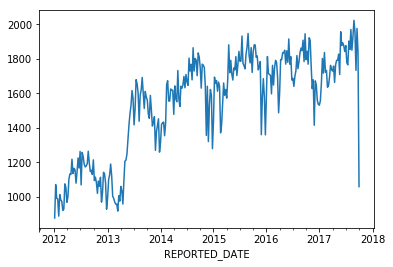

In [184]:
weekly_crime.plot.line()